In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/svhndataset/train_32x32.mat
/kaggle/input/svhndataset/test_32x32.mat
/kaggle/input/svhndataset/extra_32x32.mat


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.io import loadmat



In [3]:
import os

# Check the contents of the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/svhndataset/train_32x32.mat
/kaggle/input/svhndataset/test_32x32.mat
/kaggle/input/svhndataset/extra_32x32.mat


In [4]:
# Load the dataset from the input directory
train_data = loadmat('/kaggle/input/svhndataset/train_32x32.mat')
test_data = loadmat('/kaggle/input/svhndataset/test_32x32.mat')

# Extract the features and labels from the dataset
X_train = train_data['X']
y_train = train_data['y']
X_test = test_data['X']
y_test = test_data['y']

# Reshape the data to match the input format (num_samples, height, width, channels)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

# Replace label '10' with '0' for digit '0'
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0



In [5]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [6]:
# Create an image data generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [7]:
# Step 5: CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Step 6: Train the Model
# Train the model using the augmented data generator
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 64,
                    epochs=15)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 80s 68ms/step - accuracy: 0.3071 - loss: 1.9521 - val_accuracy: 0.7119 - val_loss: 0.9122
Epoch 2/15
   1/1144 ━━━━━━━━━━━━━━━━━━━━ 59s 52ms/step - accuracy: 0.6719 - loss: 1.0762

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6719 - loss: 1.0762 - val_accuracy: 0.7078 - val_loss: 0.9187
Epoch 3/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.6603 - loss: 1.0309 - val_accuracy: 0.7881 - val_loss: 0.7196
Epoch 4/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7812 - loss: 0.6152 - val_accuracy: 0.7835 - val_loss: 0.7405
Epoch 5/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 78s 68ms/step - accuracy: 0.7257 - loss: 0.8599 - val_accuracy: 0.8173 - val_loss: 0.6101
Epoch 6/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7344 - loss: 0.9136 - val_accuracy: 0.8173 - val_loss: 0.6089
Epoch 7/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 78s 68ms/step - accuracy: 0.7556 - loss: 0.7701 - val_accuracy: 0.8334 - val_loss: 0.5526
Epoch 8/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7656 - loss: 0.7746 - val_accuracy: 0.8361 - val_loss: 0.5463
Epoch 9/15
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 78s 68ms/step - accuracy: 0.7770 - loss: 0.7076 - val

In [17]:
# Step 7: Evaluate the Model
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")
# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8670 - loss: 0.4554
Test Accuracy: 0.8694299459457397
Test Loss: 0.4471583664417267
814/814 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [16]:
# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1744
           1       0.90      0.93      0.92      5099
           2       0.89      0.91      0.90      4149
           3       0.88      0.76      0.81      2882
           4       0.89      0.89      0.89      2523
           5       0.79      0.90      0.84      2384
           6       0.78      0.84      0.81      1977
           7       0.92      0.86      0.89      2019
           8       0.89      0.75      0.81      1660
           9       0.84      0.85      0.84      1595

    accuracy                           0.87     26032
   macro avg       0.87      0.86      0.86     26032
weighted avg       0.87      0.87      0.87     26032



In [18]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

Confusion Matrix:
 [[1505   32   16    2    1    6  108    2    5   67]
 [  48 4758   48   32  106   18   17   61    8    3]
 [  14   47 3795   44   63   96   10   49    2   29]
 [  13  104  172 2184   38  198   34   13   72   54]
 [  12  120   46   26 2257   19   11    8    2   22]
 [   5   15   40   79   17 2145   55    7    7   14]
 [  38   24   10   29   24  127 1658    3   48   16]
 [   6  141   44   29    7   41    5 1741    3    2]
 [  14   17   17   49   19   45  205    0 1240   54]
 [  51   17  100    7   10   21   30    2    7 1350]]


In [10]:
# Step 8: Save the Model to Kaggle Working Directory
# Save the trained model
model.save('/kaggle/working/svhn_cnn_model.h5')

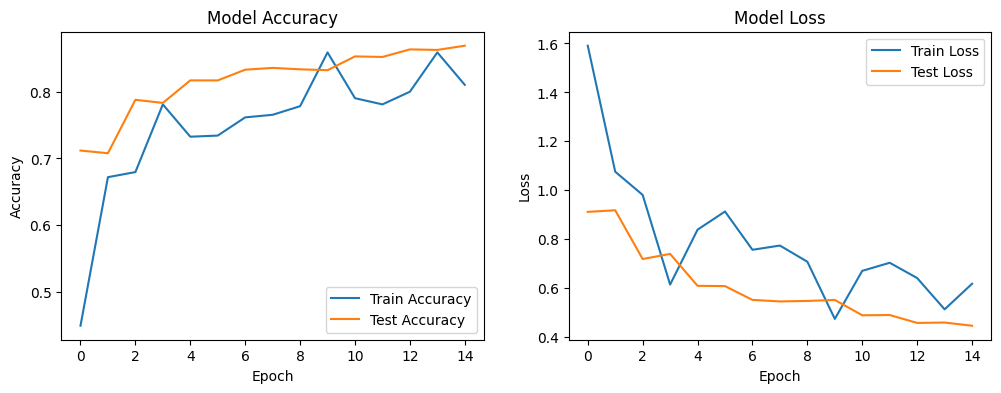

In [15]:
# Step 9: Visualize Training Results
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Save the plots to Kaggle working directory
plt.savefig('/kaggle/working/training_results.png')

# Display the plots
plt.show()



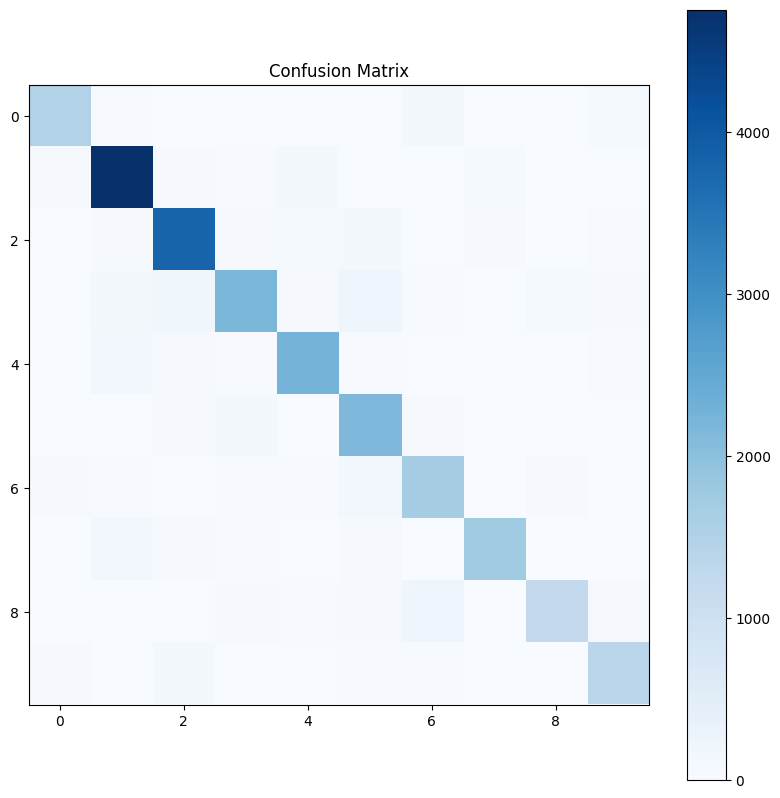

In [14]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix(y_true, y_pred_classes), cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.savefig('/kaggle/working/confusion_matrix.png')
plt.show()